--> Let's assume that there is a Hotel and there is a guard. on 1st Jan , Suresh works there and next day, Ramesh works as guard. They work alternate days. Today is 12th Jan. Who is guarding today?

In [1]:
guard = 'Ramesh'
guard


'Ramesh'

In [2]:
print(guard)


Ramesh


--> Who guards tomorrow?

In [3]:
guard = 'Suresh'
print(guard)


Suresh


--> Who guards on 20th? 

In [4]:
date = 20
if(date / 2 == 0):
    guard = 'Ramesh'
else:
    guard = 'Suresh'
print(guard)    


Suresh


--> Above works for Jan but what happens next month? after 31st jan, ...
Let's better write a function first and then see further...

In [5]:
def getGuard(date):
    if(date / 2 == 0):
        guard = 'Ramesh'
    else:
        guard = 'Suresh'
    print(guard)
getGuard(20)


Suresh


In [6]:
from datetime import date
print(date(2020,2,20))
today = date(2020,2,20)
print(today.day,today.month,today.year)
start = date(2020,1,1)

diff= today-start
print(diff.days+1)


2020-02-20
20 2 2020
51


In [7]:
def getGuard(dat,month,year):
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff= (today-start).days+1
    if(diff / 2 == 0):
        guard = 'Ramesh'
    else:
        guard = 'Suresh'
    print(guard)
getGuard(20,1,2020)


2020 1 20
Suresh


--> In same Hotel kitchen, Meena and Teena are cooks.
Meena cooks Biryani, Pulav, SambharRice and CurdRice alternate days and comes alternate days; 
Teena cooks Dosa, Vada, Poha and Idly alternate days and comes alternate days;

Can you write a code to get what will be cooked today given date?

In [8]:
def getFood(dat,month,year):
    teenaFoods = ['Dosa', 'Vada', 'Poha', 'Idly']
    meenaFoods = ['Biryani', 'Pulav', 'SambharRice', 'CurdRice']
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    if(diff % 2 == 0):
        food = meenaFoods[diff // 2]
    else:
        food = teenaFoods[diff // 2]
    print(food)

for i in range(1,11):
    print()
    getFood(i,1,2020)
    


2020 1 1
Dosa

2020 1 2
Pulav

2020 1 3
Vada

2020 1 4
SambharRice

2020 1 5
Poha

2020 1 6
CurdRice

2020 1 7
Idly

2020 1 8
Biryani

2020 1 9
Dosa

2020 1 10
Pulav


--> Can we do above with numpy???

In [9]:
import numpy as np
def getFood(dat,month,year):
    teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
    meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    if(diff % 2 == 0):
        food = meenaFoods[diff // 2]
    else:
        food = teenaFoods[diff // 2]
    print(food)

for i in range(1,11):
    print()
    getFood(i,1,2020)
    
    


2020 1 1
Dosa

2020 1 2
Pulav

2020 1 3
Vada

2020 1 4
SambharRice

2020 1 5
Poha

2020 1 6
CurdRice

2020 1 7
Idly

2020 1 8
Biryani

2020 1 9
Dosa

2020 1 10
Pulav


--> Is above really extendable if more cooks are added? What if more dishes are there?
Let's convert it to multidimentional array

In [10]:
teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])

foods = np.array([meenaFoods,teenaFoods])
print(foods)
print(foods[0])
print(foods[0][1])



[['Biryani' 'Pulav' 'SambharRice' 'CurdRice']
 ['Dosa' 'Vada' 'Poha' 'Idly']]
['Biryani' 'Pulav' 'SambharRice' 'CurdRice']
Pulav


In [11]:
def getFood(dat,month,year):
    teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
    meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])
    foods = np.array([meenaFoods,teenaFoods])
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    food = foods[(int)(diff % 2 != 0)][diff // 2]
    return food

for i in range(1,11):
    print(getFood(i,1,2020))

    

Dosa
Pulav
Vada
SambharRice
Poha
CurdRice
Idly
Biryani
Dosa
Pulav


--> Can we have a list of what people eat in first 20 days of Jan

In [12]:
foods = np.array([])
for i in range(1,21):
    foods = np.append(foods,getFood(i,1,2020))
print(foods)
print(foods.shape)



['Dosa' 'Pulav' 'Vada' 'SambharRice' 'Poha' 'CurdRice' 'Idly' 'Biryani'
 'Dosa' 'Pulav' 'Vada' 'SambharRice' 'Poha' 'CurdRice' 'Idly' 'Biryani'
 'Dosa' 'Pulav' 'Vada' 'SambharRice']
(20,)


--> Can you please arrange it by cook?

In [13]:
foodsnd = foods.reshape(2,10)



In [14]:
foods.reshape(2,10).transpose()



array([['Dosa', 'Vada'],
       ['Pulav', 'SambharRice'],
       ['Vada', 'Poha'],
       ['SambharRice', 'CurdRice'],
       ['Poha', 'Idly'],
       ['CurdRice', 'Biryani'],
       ['Idly', 'Dosa'],
       ['Biryani', 'Pulav'],
       ['Dosa', 'Vada'],
       ['Pulav', 'SambharRice']], dtype='<U32')

In [15]:
tfs = np.array([])
for food in foods:
    if(np.isin(food,teenaFoods)):
        tfs = np.append(tfs,food)
print(tfs)



['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada']


In [16]:
tfs = [food for food in foods if np.isin(food,teenaFoods) ]
tfs



['Dosa',
 'Vada',
 'Poha',
 'Idly',
 'Dosa',
 'Vada',
 'Poha',
 'Idly',
 'Dosa',
 'Vada']

In [17]:
mfs = [food for food in foods if np.isin(food,meenaFoods) ]
mfs



['Pulav',
 'SambharRice',
 'CurdRice',
 'Biryani',
 'Pulav',
 'SambharRice',
 'CurdRice',
 'Biryani',
 'Pulav',
 'SambharRice']

--> What are different food options available in this Hotel? How can you merge values of dishes from different cooks?

In [18]:
np.unique(foods)



array(['Biryani', 'CurdRice', 'Dosa', 'Idly', 'Poha', 'Pulav',
       'SambharRice', 'Vada'], dtype='<U32')

In [19]:
print(np.hstack([tfs,mfs]))
print(np.vstack([tfs,mfs]))
print(np.concatenate((tfs,mfs)))



['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada'
 'Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
 'CurdRice' 'Biryani' 'Pulav' 'SambharRice']
[['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada']
 ['Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
  'CurdRice' 'Biryani' 'Pulav' 'SambharRice']]
['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada'
 'Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
 'CurdRice' 'Biryani' 'Pulav' 'SambharRice']


--> Now imagine that both guards get 100Rs and cook as 200rs as salary every day...
can we have a representation of their salaries?

In [20]:
salaries = {'Suresh':100,'Ramesh':100,'Teena':200,'Meena':200}



In [21]:
salaries['Suresh']



100

In [22]:
for key,val in salaries.items():
    print(key,val)
    
    

Meena 200
Suresh 100
Teena 200
Ramesh 100


In [23]:
for key in salaries:
    print(key)
    print(key,salaries[key])
for val in salaries.values():
    print(val)
    
    

Meena
Meena 200
Suresh
Suresh 100
Teena
Teena 200
Ramesh
Ramesh 100
200
100
200
100



PANDAS
------------------------------------------

In [24]:
import pandas as pd



In [25]:
pd.DataFrame({'No':[1,2,3],'Yes':[4,5,6]})



,No,Yes
0,1,4
1,2,5
2,3,6


In [26]:
pd.DataFrame({'Cities':['Hyd','Del','Mum'],'Population':[112,223,345]})



,Cities,Population
0,Hyd,112
1,Del,223
2,Mum,345


In [27]:
pd.DataFrame({'Cities':['Hyd','Del','Mum'],'Population':[112,223,345]},index=['row1','row2','row3'])



,Cities,Population
row1,Hyd,112
row2,Del,223
row3,Mum,345


In [28]:
pd.Series(['Hyd','Del','Mum'])



0    Hyd
1    Del
2    Mum
dtype: object

In [29]:
pd.Series(['Hyd','Del','Mum'],index=['row1','row2','row3'])



row1    Hyd
row2    Del
row3    Mum
dtype: object

In [30]:
#wine_reviews = pd.read_csv("winemag-data-130k-v2.csv")
wine_reviews = pd.read_csv("winemag.csv")



In [31]:
wine_reviews.shape



(10007, 14)

In [32]:
wine_reviews.head()



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
wine_reviews.tail()



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10002,10002,Italy,Here's a lovely sparkling wine that offers a f...,Brut,91,29.0,Lombardy,Franciacorta,NaN,Kerin O’Keefe,@kerinokeefe,Il Mosnel NV Brut Sparkling (Franciacorta),Sparkling Blend,Il Mosnel
10003,10003,Canada,This vibrantly aromatic wine brings generous n...,Icewine,91,60.0,Ontario,Niagara Peninsula,NaN,Sean P. Sullivan,@wawinereport,Inniskillin 2011 Icewine Vidal (Niagara Penins...,Vidal,Inniskillin
10004,10004,France,"A crisp, finely balanced wine, this is packed ...",La Cuvée 17 Brut,91,57.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,J. Dumangin Fils NV La Cuvée 17 Brut (Champagne),Champagne Blend,J. Dumangin Fils
10005,10005,US,Full-throttle Burgundian technique marks this ...,Finch Hollow Estate Grown Cave Fermented,91,110.0,California,Napa Valley,Napa,NaN,NaN,Jarvis 2011 Finch Hollow Estate Grown Cave Fer...,Chardonnay,Jarvis
10006,10006,France,"While full and ripe in style, this wine is als...",Cuvée Spéciale Brut Millesimé,91,75.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Nicolas Feuillatte 2005 Cuvée Spéciale Brut Mi...,Champagne Blend,Nicolas Feuillatte


In [34]:
wine_reviews.country



0              Italy
1           Portugal
2                 US
3                 US
4                 US
5              Spain
6              Italy
7             France
8            Germany
9             France
10                US
11            France
12                US
13             Italy
14                US
15           Germany
16         Argentina
17         Argentina
18             Spain
19                US
20                US
21                US
22             Italy
23                US
24             Italy
25                US
26             Italy
27             Italy
28             Italy
29                US
            ...     
9977              US
9978           Chile
9979           Chile
9980           Italy
9981              US
9982           Chile
9983     New Zealand
9984     New Zealand
9985       Australia
9986           Chile
9987           Italy
9988           Italy
9989           Italy
9990              US
9991              US
9992              US
9993       Au

In [35]:
wine_reviews['country']



0              Italy
1           Portugal
2                 US
3                 US
4                 US
5              Spain
6              Italy
7             France
8            Germany
9             France
10                US
11            France
12                US
13             Italy
14                US
15           Germany
16         Argentina
17         Argentina
18             Spain
19                US
20                US
21                US
22             Italy
23                US
24             Italy
25                US
26             Italy
27             Italy
28             Italy
29                US
            ...     
9977              US
9978           Chile
9979           Chile
9980           Italy
9981              US
9982           Chile
9983     New Zealand
9984     New Zealand
9985       Australia
9986           Chile
9987           Italy
9988           Italy
9989           Italy
9990              US
9991              US
9992              US
9993       Au

In [36]:
wine_reviews['country'][0]



'Italy'

In [37]:
wine_reviews.iloc[0]



Unnamed: 0                                                               0
country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                   

In [38]:
wine_reviews.iloc[:,0]



0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
9977      9977
9978      9978
9979      9979
9980      9980
9981      9981
9982      9982
9983      9983
9984      9984
9985      9985
9986      9986
9987      9987
9988      9988
9989      9989
9990      9990
9991      9991
9992      9992
9993      9993
9994      9994
9995      9995
9996      9996
9997      9997
9998      9998
9999      9999
10000    10000
10001    10001
10002    10002
10003    10003
10004    10004
10005    10005
10006    10006
Name: Unnamed: 0, Length: 10007, dtype: int64

In [39]:
wine_reviews.iloc[1:3,0]



1    1
2    2
Name: Unnamed: 0, dtype: int64

In [40]:
reviews = wine_reviews
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]




,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
26,26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari
27,27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari
28,28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta


In [41]:
reviews.describe()



,Unnamed: 0,points,price
count,10007.000000,10007.000000,9321.000000
mean,5003.000000,88.397522,35.525587
std,2888.916406,3.010486,44.294402
min,0.000000,80.000000,4.000000
25%,2501.500000,86.000000,17.000000
50%,5003.000000,88.000000,25.000000
75%,7504.500000,90.000000,42.000000
max,10006.000000,100.000000,1900.000000


In [42]:
reviews.points.mean()



88.39752173478566

In [43]:
reviews.taster_name.unique()



array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams'], dtype=object)

In [44]:
reviews.groupby('points').points.count()



points
80       16
81       42
82      129
83      274
84      450
85      786
86      999
87     1424
88     1341
89      934
90     1116
91      718
92      828
93      514
94      244
95      122
96       42
97       18
98        6
99        2
100       2
Name: points, dtype: int64

In [45]:
reviews.groupby('points').price.min()



points
80       8.0
81       7.0
82       6.0
83       5.0
84       5.0
85       4.0
86       5.0
87       6.0
88       7.0
89       8.0
90       8.0
91      12.0
92      13.0
93      13.0
94      18.0
95      20.0
96      29.0
97      50.0
98      50.0
99      94.0
100    210.0
Name: price, dtype: float64

In [46]:
reviews[pd.isnull(reviews.country)]



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi


In [47]:
reviews.region_2.fillna("Unknown")



0                  Unknown
1                  Unknown
2        Willamette Valley
3                  Unknown
4        Willamette Valley
5                  Unknown
6                  Unknown
7                  Unknown
8                  Unknown
9                  Unknown
10                    Napa
11                 Unknown
12                  Sonoma
13                 Unknown
14           Central Coast
15                 Unknown
16                 Unknown
17                 Unknown
18                 Unknown
19                 Unknown
20                 Unknown
21            Oregon Other
22                 Unknown
23           Central Coast
24                 Unknown
25                  Sonoma
26                 Unknown
27                 Unknown
28                 Unknown
29          Central Valley
               ...        
9977       Columbia Valley
9978               Unknown
9979               Unknown
9980               Unknown
9981               Unknown
9982               Unknown
9

____________________

MATPLOTLIB 
__________________________

In [48]:
import matplotlib.pyplot as plt
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
plt.plot(X,Y)



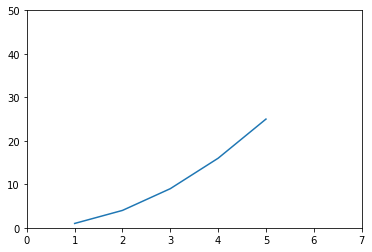

In [49]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
plt.plot(X,Y)
plt.axis([0,7,0,50])
plt.show()



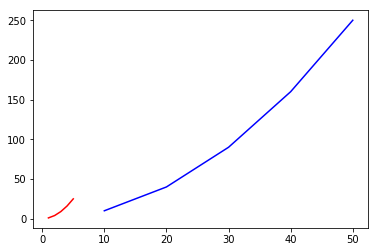

In [50]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = [10,20,30,40,50]
Y1 = [10,40,90,160,250]

plt.plot(X,Y,'r',X1,Y1,'b')



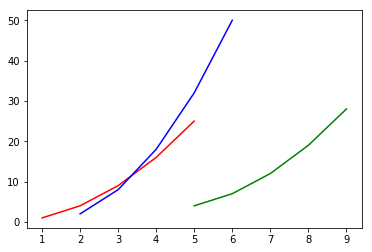

In [51]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = np.array(X) + 1
Y1 = np.array(Y) * 2

plt.plot(X,Y,'r')
plt.plot(X1,Y1,'b')
plt.plot(np.array(X) + 4,np.array(X)**2 + 3,'g')



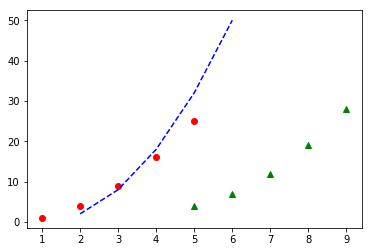

In [52]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = np.array(X) + 1
Y1 = np.array(Y) * 2

plt.plot(X,Y,'ro')
plt.plot(X1,Y1,'b--')
plt.plot(np.array(X) + 4,np.array(X)**2 + 3,'g^')



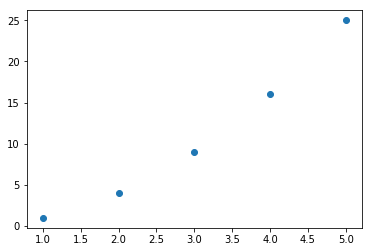

In [53]:
plt.scatter(X,Y)



In [54]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

pd.DataFrame(data)



,a,b,c,d
0,0,-1.433351,33,1.832213
1,1,-8.067736,44,41.859749
2,2,-8.770957,38,48.616492
3,3,1.775150,46,46.037128
4,4,2.805406,2,84.356458
5,5,7.729141,26,33.505310
6,6,7.290049,22,95.810674
7,7,13.957178,21,127.743464
8,8,-19.240050,5,27.007519
9,9,9.764959,12,168.186800


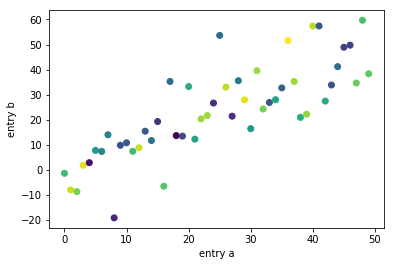

In [55]:
plt.scatter('a', 'b', c='c', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()



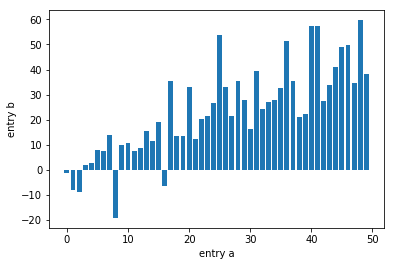

In [56]:
plt.bar('a', 'b', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()



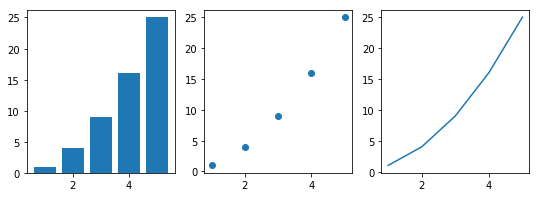

In [57]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(X, Y)
plt.subplot(132)
plt.scatter(X, Y)
plt.subplot(133)
plt.plot(X, Y)
plt.show()

